In [3]:
import pandas as pd
import numpy as np


# EDA & Data Wrangling

In [4]:
train_set= pd.read_csv('C:/Users/96650/OneDrive/Desktop/spiced_projects/student-code/thyme-machine-student-code/data/train.csv')

In [5]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
survivedpass= train_set[train_set['Survived']==1]
survived = survivedpass['Survived'].count()

deadpa= train_set[train_set['Survived']==0]
dead= deadpa["Survived"].count()
print(f'The number of survived people is {survived} \nThe number of unsurvived people is {dead}')

The number of survived people is 342 
The number of unsurvived people is 549


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'surviving/non-surviving passengers')

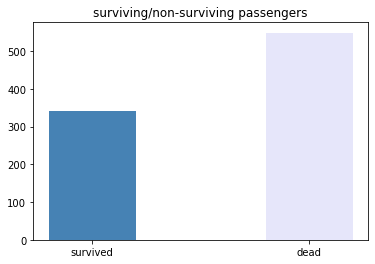

In [10]:

plt.bar('survived' ,len(survivedpass['Survived']) , width= 0.4, color='steelblue')
plt.bar( 'dead' ,len(deadpa["Survived"]), width= 0.4 ,color='lavender')

plt.title('surviving/non-surviving passengers')

In [11]:
survived_pclass = train_set[['Survived', 'Pclass']]         



In [12]:

survived_pclassdf = survived_pclass.groupby(['Pclass']).sum()
total_pclassdf = survived_pclass.groupby(['Pclass']).count()


total_pclassdf.rename(columns = {'Survived':'Total'}, inplace = True)

# merge separate data into one dataframe
total_survived_pclass = pd.merge(survived_pclassdf, total_pclassdf, left_index=True, right_index=True) 
total_survived_pclass

,Survived,Total
Pclass,,
1,136,216
2,87,184
3,119,491


In [13]:
proportion_survived = (total_survived_pclass['Survived'] / total_survived_pclass['Total']) 
total_survived_pclass['proportion'] = proportion_survived

total_survived_pclass

,Survived,Total,proportion
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


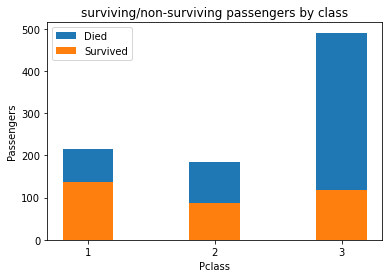

In [14]:
plt.bar(total_survived_pclass.index.values,total_survived_pclass['Total'],width= 0.40, label='Died')

plt.bar(total_survived_pclass.index.values,total_survived_pclass['Survived'],width= 0.40,label='Survived')


plt.xticks(total_survived_pclass.index.values) 
plt.title('surviving/non-surviving passengers by class')
plt.xlabel('Pclass')
plt.ylabel('Passengers')
plt.legend()

In [15]:
def sex_pclass(sex,pclass):
    gender_class=train_set[(train_set['Sex'] == sex) & (train_set['Pclass'] == pclass)]
    print(f"{sex} {pclass} class: {len(gender_class)} \n")

In [16]:
sex_list= ['female','male']
pclass_list= [1,2,3]
for s in sex_list:
    for c in pclass_list:
        sex_pclass(s,c)

#firtclass_f= sex_pclass('female',1)
#firstclass_m= sex_pclass('male',1)
#secondclass_f= sex_pclass('female',2)
#secondclass_m= sex_pclass('male',2)
#thirdclass_f= sex_pclass('female',3)
#thirdclass_m= sex_pclass('male',3)

female 1 class: 94 

female 2 class: 76 

female 3 class: 144 

male 1 class: 122 

male 2 class: 108 

male 3 class: 347 



In [17]:
import seaborn as sns

<AxesSubplot:xlabel='Pclass', ylabel='count'>

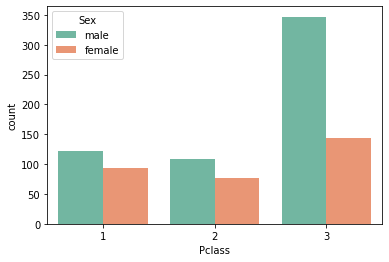

In [18]:
#grouped_sex_pclass = train_set.groupby(['Sex', 'Pclass'])['Pclass'].count()

#https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(x="Pclass", hue="Sex", data=train_set, palette="Set2")

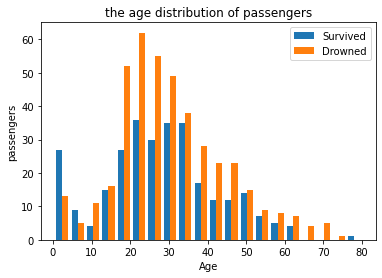

In [19]:


plt.hist([survivedpass['Age'],deadpa['Age']],
         bins=20,label=['Survived', 'Drowned'])

plt.xlabel('Age')
plt.ylabel('passengers')
plt.title('the age distribution of passengers')
plt.legend()
plt.show()


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

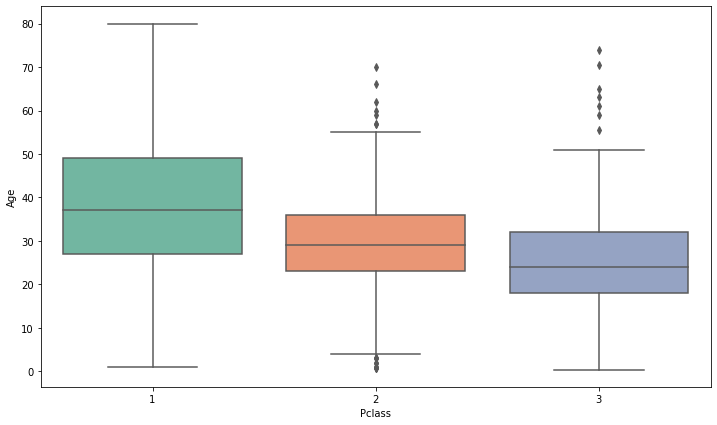

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_set,palette='Set2')

In [21]:


averg_survivedage= survivedpass['Age'].mean()

avrege_drowedage= deadpa['Age'].mean()


print(f'the average age for survived passengers : {averg_survivedage}\n'
      f'the average age for drowned passengers : {avrege_drowedage} ')


the average age for survived passengers : 28.343689655172415
the average age for drowned passengers : 30.62617924528302 


## Handling the missing values:

In [22]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
train_set = train_set.drop(columns='Cabin', axis=1)

In [24]:
#Replace missing age values by the mean age

train_set['Age'].fillna(train_set['Age'].mean(),inplace = True)

In [25]:
train_set['Embarked'].fillna(train_set['Embarked'].mode()[0], inplace=True)

In [26]:
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
#https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

count_table =pd.crosstab(index= [train_set['Pclass'],train_set['Sex']],
                         columns=train_set['Survived'], colnames=' ')
count_table= count_table.rename(columns={0: 'Drowned', 1: 'Survived'})

count_table

Drowned  Survived
Pclass Sex                      
1      female        3        91
       male         77        45
2      female        6        70
       male         91        17
3      female       72        72
       male        300        47

In [28]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

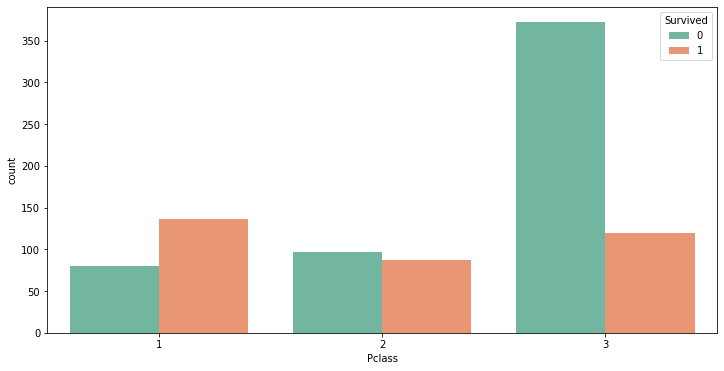

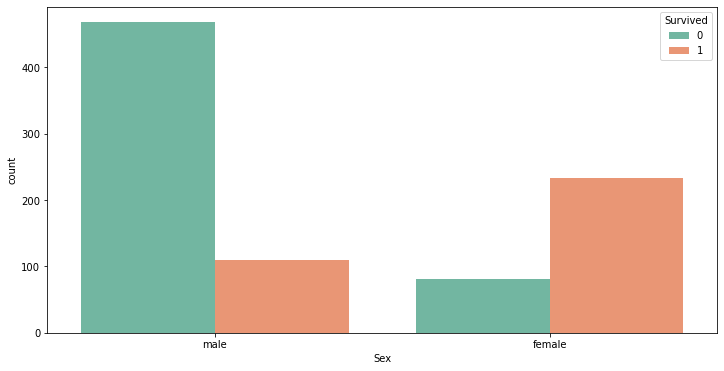

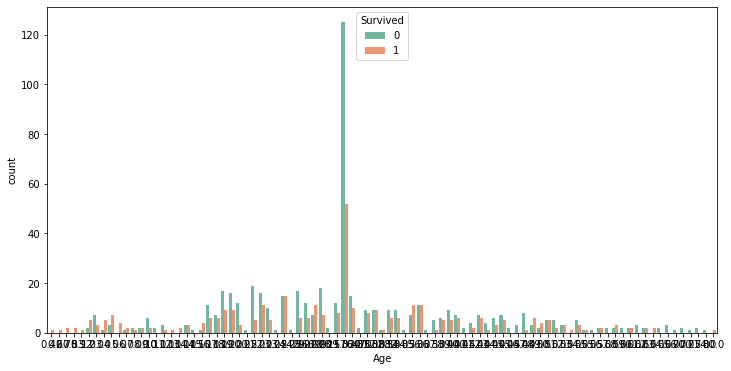

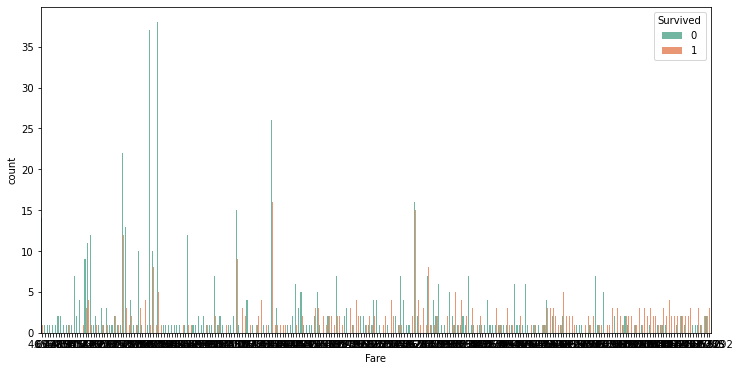

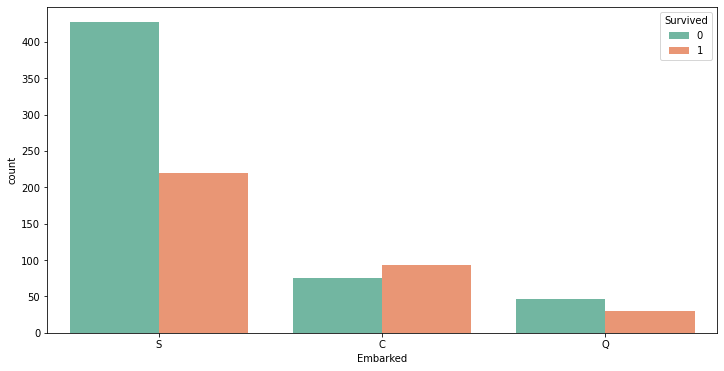

In [29]:
feature = [ 'Pclass',  'Sex','Age','Fare','Embarked']

for f in feature:
    plt.figure(figsize=(12,6))
    sns.countplot(x= f , data = train_set , palette= 'Set2',hue = 'Survived')
    #if f=='Age':
        #ax.set_xticks([2, 4, 6, 8, 10])
        #plt.xticks(np.arange(min(train_set['Age']), max(train_set['Age'])+1, 10))
        #plt.axes().set_xticks(np.arange(min(train_set['Age']), max(train_set['Age'])+1, 10))
    plt.show()

# feature engineering techniques

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, KBinsDiscretizer , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score


In [31]:
X= train_set[feature]
y= train_set['Survived']

X.shape, y.shape



((891, 5), (891,))

In [32]:
#train_set['CatAge'] = pd.qcut(train_set.Age, q=4, labels=False )
#train_set

In [33]:
# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=55)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 5), (712,), (179, 5), (179,))

In [34]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
314,2,male,43.0,26.2500,S
218,1,female,32.0,76.2917,C
156,3,female,16.0,7.7333,Q
662,1,male,47.0,25.5875,S
447,1,male,34.0,26.5500,S


In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 314 to 461
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   Fare      712 non-null    float64
 4   Embarked  712 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.4+ KB


In [79]:
y_train

314    0
218    1
156    1
662    0
447    1
      ..
823    1
541    0
295    0
666    0
461    0
Name: Survived, Length: 712, dtype: int64

In [77]:
y_test

713    0
726    1
262    0
266    0
186    1
      ..
151    1
631    0
723    0
61     1
192    1
Name: Survived, Length: 179, dtype: int64

In [38]:
ohe_pip = make_pipeline(SimpleImputer(strategy = 'most_frequent') ,OneHotEncoder(drop='first')) #embarked
bin_pip = make_pipeline(SimpleImputer(strategy='mean'),KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')) #age


In [39]:
#ohe = OneHotEncoder(drop='first')

In [40]:
#scaler = StandardScaler()

In [41]:
#('age_bin_train', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform') , ['Age'])
alltrans = ColumnTransformer([('age_bin_train',bin_pip , ['Age']),
    ('embarked_ohe_train', ohe_pip, ['Embarked']),
    ('ohe_pclass', OneHotEncoder(drop='first'),['Pclass']),
    ('sex_ohe_train', OneHotEncoder(drop='first'), ['Sex']),
    ('fare_scaled_train', StandardScaler(), ['Fare'])
],remainder='passthrough')

In [42]:
#X_train_fit.get_feature_names_out()

In [43]:
X_train_fit = pd.DataFrame(alltrans.fit_transform(X_train),columns=['age_bin_train','embarked_ohe_train Q','embarked_ohe_train S','ohe_pclass 2','ohe_pclass 3','Sex_male','fare_scaled_train'])
X_train_fit
#get_feature_names_out()
#, columns = alltrans.get_feature_names()

,age_bin_train,embarked_ohe_train Q,embarked_ohe_train S,ohe_pclass 2,ohe_pclass 3,Sex_male,fare_scaled_train
0,1.0,0.0,1.0,1.0,0.0,1.0,-0.122946
1,1.0,0.0,0.0,0.0,0.0,0.0,0.913876
2,0.0,1.0,0.0,0.0,1.0,0.0,-0.506597
3,1.0,0.0,1.0,0.0,0.0,1.0,-0.136673
4,1.0,0.0,1.0,0.0,0.0,1.0,-0.116730
...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,0.0,1.0,0.0,-0.408353
708,0.0,0.0,1.0,0.0,1.0,0.0,-0.018832
709,1.0,0.0,0.0,0.0,0.0,1.0,-0.092472
710,0.0,0.0,1.0,1.0,0.0,1.0,-0.397475


In [44]:
X_train_fit.isnull().sum()

age_bin_train           0
embarked_ohe_train Q    0
embarked_ohe_train S    0
ohe_pclass 2            0
ohe_pclass 3            0
Sex_male                0
fare_scaled_train       0
dtype: int64

In [45]:
#alltrans.get_feature_names()

In [46]:

X_test_fit = pd.DataFrame(alltrans.fit_transform(X_test),columns=['age_bin_train','embarked_ohe_train Q','embarked_ohe_train S','ohe_pclass 2','ohe_pclass 3','Sex_male','fare_scaled_train'])
X_test_fit

,age_bin_train,embarked_ohe_train Q,embarked_ohe_train S,ohe_pclass 2,ohe_pclass 3,Sex_male,fare_scaled_train
0,1.0,0.0,1.0,0.0,1.0,1.0,-0.415440
1,1.0,0.0,1.0,1.0,0.0,0.0,-0.205608
2,2.0,0.0,1.0,0.0,0.0,1.0,0.862982
3,0.0,0.0,1.0,0.0,1.0,1.0,0.134874
4,1.0,1.0,0.0,0.0,1.0,0.0,-0.305817
...,...,...,...,...,...,...,...
174,0.0,0.0,1.0,0.0,0.0,0.0,0.625214
175,2.0,0.0,1.0,0.0,1.0,1.0,-0.459697
176,2.0,0.0,1.0,1.0,0.0,1.0,-0.351366
177,1.0,0.0,1.0,0.0,0.0,0.0,0.869359


In [47]:
y_train.value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [48]:
# SKLearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

log_reg = LogisticRegression(class_weight='balanced',random_state=55)

log_reg.fit(X_train_fit, y_train)

LogisticRegression(class_weight='balanced', random_state=55)

In [49]:
w0 = log_reg.intercept_
w1 = log_reg.coef_

print(f'LogReg Model Intercept: {w0}\nLogReg Model Feature Coefficient: {w1}')

LogReg Model Intercept: [3.31168252]
LogReg Model Feature Coefficient: [[-0.53971519 -0.19416496 -0.64009792 -0.5046128  -1.77456946 -2.4068154
   0.10823357]]


In [50]:

y_pred = log_reg.predict(X_test_fit)

pred_prob = log_reg.predict_proba(X_test_fit)
pred_prob

array([[0.8903655 , 0.1096345 ],
       [0.16728354, 0.83271646],
       [0.67288387, 0.32711613],
       [0.81685783, 0.18314217],
       [0.31645027, 0.68354973],
       [0.82600744, 0.17399256],
       [0.8254979 , 0.1745021 ],
       [0.83915645, 0.16084355],
       [0.80916156, 0.19083844],
       [0.89067071, 0.10932929],
       [0.89083302, 0.10916698],
       [0.55874442, 0.44125558],
       [0.89036229, 0.10963771],
       [0.2900742 , 0.7099258 ],
       [0.83913537, 0.16086463],
       [0.8906411 , 0.1093589 ],
       [0.89067071, 0.10932929],
       [0.41204197, 0.58795803],
       [0.55847495, 0.44152505],
       [0.79467834, 0.20532166],
       [0.06494413, 0.93505587],
       [0.31976535, 0.68023465],
       [0.29859829, 0.70140171],
       [0.89067071, 0.10932929],
       [0.89067071, 0.10932929],
       [0.69914385, 0.30085615],
       [0.41047108, 0.58952892],
       [0.53249274, 0.46750726],
       [0.71486112, 0.28513888],
       [0.79612247, 0.20387753],
       [0.

In [51]:
log_reg.classes_

array([0, 1], dtype=int64)

In [52]:
pd.DataFrame(data = pred_prob, columns = log_reg.classes_)

,0,1
0,0.890366,0.109634
1,0.167284,0.832716
2,0.672884,0.327116
3,0.816858,0.183142
4,0.316450,0.683550
...,...,...
174,0.060696,0.939304
175,0.933329,0.066671
176,0.795321,0.204679
177,0.097443,0.902557


In [53]:
cross_validation_log = cross_val_score(estimator=log_reg, 
                                     X=X_train_fit,
                                     y=y_train,
                                     scoring='accuracy', 
                                     cv=5, 
                                     verbose=5) 

[CV] END ................................ score: (test=0.755) total time=   0.0s
[CV] END ................................ score: (test=0.741) total time=   0.0s
[CV] END ................................ score: (test=0.817) total time=   0.0s
[CV] END ................................ score: (test=0.803) total time=   0.0s
[CV] END ................................ score: (test=0.782) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [54]:
print(f'Validation accuracy scores: {np.round(cross_validation_log,2)}')
print(f'\nmean: {cross_validation_log.mean():.2}')
print(f'std: {cross_validation_log.std():.2}')


# Accuracy on Train
print("The Training Accuracy is: ", round(log_reg.score(X_train_fit, y_train),3))

# Accuracy on Test
print("The Testing Accuracy is: ", round(log_reg.score(X_test_fit, y_test),3))

Validation accuracy scores: [0.76 0.74 0.82 0.8  0.78]

mean: 0.78
std: 0.028
The Training Accuracy is:  0.781
The Testing Accuracy is:  0.765


# Evaluation Metrics

In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score , ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn import metrics

In [86]:

#F1 score should be used when both precision and recall are important for the use case. 

In [93]:
#Accuracy metric can be used to evaluate the classifier when the data set is a balanced data set.
print(f"Accuracy of the LogisticRegression is: {accuracy_score(y_test,y_pred)}")

Accuracy of the LogisticRegression is: 0.7653631284916201


[[88 22]
 [20 49]]


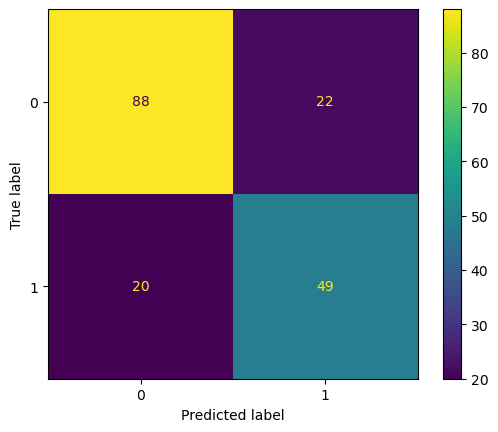

In [91]:

plt.style.use('default')

##confusion matrix can be used to evaluate a classifier whenever the data set is imbalanced.
print(confusion_matrix(y_test, y_pred))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(log_reg , X_test_fit, y_test)
plt.show()

#True Positives (TP): 49
#False positives (FP): 22
#True Negatives (TN): 88
#False Negatives (FN): 20


In [95]:
print(f"Precision Score of the LogisticRegression is: {precision_score(y_test, y_pred)}")
print(f"Recall Score of the LogisticRegression is: {recall_score(y_test, y_pred)}")
print(f"F1 Score of the LogisticRegression is: {f1_score(y_test, y_pred)}")

Precision Score of the LogisticRegression is: 0.6901408450704225
Recall Score of the LogisticRegression is: 0.7101449275362319
F1 Score of the LogisticRegression is: 0.7


# the ROC Curve

In [99]:
pred_pr=log_reg.predict_proba(X_test_fit)


In [111]:

fpr, tpr, threshold = metrics.roc_curve(y_test,pred_pr[:,1]);

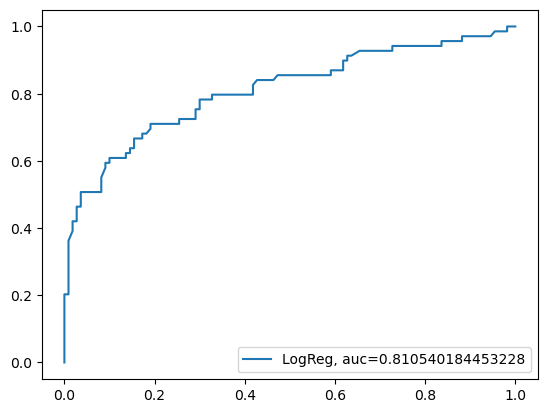

In [124]:

#plt.plot(fpr,  tpr)

# axis labels
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')

# show the plot
#plt.show()
auc = metrics.roc_auc_score(y_test, pred_pr[:,1])

#create ROC curve
plt.plot(fpr,tpr,label="LogReg, auc="+str(auc))
plt.legend(loc=4)
plt.show()


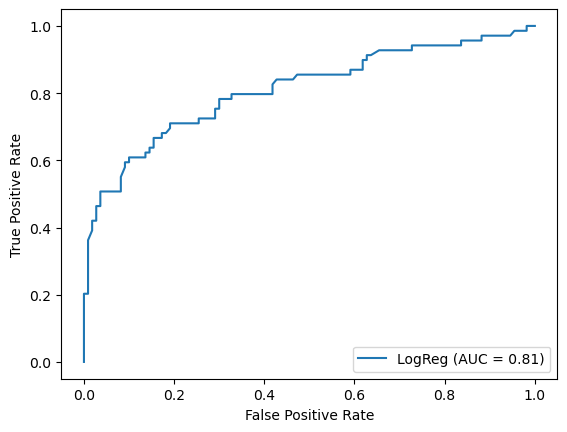

In [123]:
p=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='LogReg')
p.plot()

# Decision trees 

In [56]:
#https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
#X_train_fit.head(10)

In [60]:
#Finding the optimal value formax_depth
#we wil see the accuracy for the model with different values for max_depth


max_depth_r = list(range(1, 7))# the list of values to try for max_depth
accuracy_train = []
accuracy_test = [] # list to store the accuracy for each value of max_depth
for depth in max_depth_r:
    
    dt = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 15)
    dt.fit(X_train_fit,y_train)
    ypred = dt.predict(X_train_fit)
    score_train = dt.score(X_train_fit,y_train)
    score_test = dt.score(X_test_fit, y_test)
    accuracy_train.append(score_train)
    accuracy_test.append(score_test)

accuracy_list = zip(max_depth_r,accuracy_train,accuracy_test)
df_dt = pd.DataFrame(data = accuracy_list,
    columns=['max_depth_r', 'accuracy_train','accuracy_test'])

df_dt

,max_depth_r,accuracy_train,accuracy_test
0,1,0.787921,0.782123
1,2,0.792135,0.765363
2,3,0.813202,0.798883
3,4,0.825843,0.798883
4,5,0.838483,0.798883
5,6,0.865169,0.776536


In [61]:
# max_depth is not always equal to depth
print(dt.get_depth())
print(dt.get_n_leaves())

6
43


Text(0, 0.5, 'accuracy')

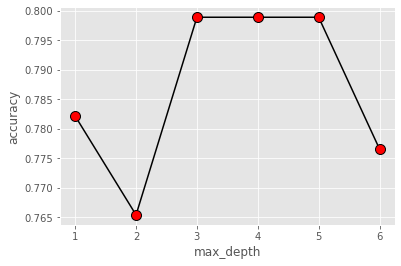

In [62]:
#the best accuracy for our the model is when the parameter max_depth is 3,4,5
#max_depth=3
plt.style.use('ggplot')
plt.plot(max_depth_r,accuracy_test,color='black', marker='o', markerfacecolor='red',markersize=10)
plt.xlabel('max_depth')
plt.ylabel('accuracy')


In [63]:
importances = pd.DataFrame({'feature':X_train_fit.columns,'importance':dt.feature_importances_})
importances = importances.sort_values('importance',ascending=False)
importances = importances.reset_index(drop=True)
importances 

,feature,importance
0,Sex_male,0.504933
1,fare_scaled_train,0.317560
2,ohe_pclass 3,0.133450
3,age_bin_train,0.028125
4,embarked_ohe_train S,0.011396
5,embarked_ohe_train Q,0.004536
6,ohe_pclass 2,0.000000


# Random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [65]:
#list comprehension
n_estimators = [int(x) for x in [200,300,400,500]]

max_features = [int(x) for x in [2,3,4,5]]
# Maximum number of levels in tree
max_depth = [int(x) for x in [2,3,4,5]]
#max_depth.append(max_depth)
# Method of selecting samples for training each tree
bootstrap = [True, False]
#to search for best hyperparameters
random_rfc_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}


In [66]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
rfc =RandomForestClassifier()
rfc_rs = RandomizedSearchCV(estimator = rfc, param_distributions = random_rfc_grid, 
                        random_state=55)


In [67]:
rfc_rs.fit(X_train_fit, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        ('max_depth', [2, 3, 4, 5, [...]]),
                                        'max_features': [2, 3, 4, 5],
                                        'n_estimators': [200, 300, 400, 500]},
                   random_state=55)

In [68]:
rfc_rs.best_params_

{'n_estimators': 400, 'max_features': 5, 'max_depth': 4, 'bootstrap': True}

In [70]:
rfc_p= RandomForestClassifier(n_estimators= 400, max_features= 5, max_depth= 4, bootstrap= True)


In [72]:
rfc_p.fit(X_train_fit, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=400)

In [73]:
rfc_p.score(X_train_fit, y_train)

0.8286516853932584

In [74]:
rfc_p.score(X_test_fit, y_test)

0.7988826815642458

In [75]:
importances = pd.DataFrame({'feature':X_train_fit.columns,'importance':rfc_p.feature_importances_})
importances = importances.sort_values('importance',ascending=False)
importances = importances.reset_index(drop=True)
importances 

,feature,importance
0,Sex_male,0.574211
1,fare_scaled_train,0.204554
2,ohe_pclass 3,0.161199
3,age_bin_train,0.024084
4,embarked_ohe_train S,0.018799
5,ohe_pclass 2,0.010092
6,embarked_ohe_train Q,0.007061


In [80]:
from sklearn.model_selection import StratifiedShuffleSplit


In [81]:
# if we have an imbalanced classification we could use StratifiedShuffleSplit
sfs = StratifiedShuffleSplit(n_splits=5,
                           test_size=0.20,
                           random_state=22)

In [82]:

cross_validation_rfc_p = cross_val_score(estimator=rfc_p, # the model to evaluate
                                     X=X_train_fit,
                                     y=y_train,
                                     scoring='accuracy', # evaluation metrics
                                     cv=sfs, # cross validation splitting
                                     verbose=3) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.748) total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ................................ score: (test=0.776) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] END ................................ score: (test=0.853) total time=   0.4s
[CV] END ................................ score: (test=0.776) total time=   0.3s
[CV] END ................................ score: (test=0.804) total time=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [83]:
print(f'Validation accuracy scores: {np.round(cross_validation_rfc_p,2)}')
print(f'\nmean: {cross_validation_rfc_p.mean():.2}')
print(f'std: {cross_validation_rfc_p.std():.2}')


# Accuracy on Train
print("The Training Accuracy is: ", round(rfc_p.score(X_train_fit, y_train),3))

# Accuracy on Test
print("The Testing Accuracy is: ", round(rfc_p.score(X_test_fit, y_test),3))

Validation accuracy scores: [0.75 0.78 0.85 0.78 0.8 ]

mean: 0.79
std: 0.035
The Training Accuracy is:  0.829
The Testing Accuracy is:  0.799


In [ ]:
#sources
#https://www.youtube.com/watch?v=J4Wdy0Wc_xQ
#https://course18.fast.ai/lessonsml1/lesson1.html